In [1]:
# General

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import os # accessing directory structure
import pickle

# EDA

import matplotlib.pyplot as plt # plotting
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# NLP 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('stopwords')
#nltk.download("punkt")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
movie = pd.read_csv('gdrive/My Drive/IMDB Dataset.csv')
movie.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
movie.shape

(50000, 2)

In [5]:
movie_re = movie.copy()

In [7]:
movie_re['no_of_chars'] = movie_re['review'].apply(len)
movie_re['no_of_words'] = movie_re['review'].apply(lambda x: len(nltk.word_tokenize(x)))
movie_re['no_of_sents'] = movie_re['review'].apply(lambda x: len(nltk.sent_tokenize(x)))
movie_re['Temp'] = movie_re['sentiment'].map({'positive': 0, 'negative': 1})

movie_re.head()

,review,sentiment,no_of_chars,no_of_words,no_of_sents,Temp
0,One of the other reviewers has mentioned that ...,positive,1761,378,10,0
1,A wonderful little production. <br /><br />The...,positive,998,201,7,0
2,I thought this was a wonderful way to spend ti...,positive,926,205,4,0
3,Basically there's a family where a little boy ...,negative,748,175,6,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,283,9,0


In [8]:
temp = pd.DataFrame()
temp['sentiment'] = ['positive','negative']
temp['Count'] = [len(movie_re[movie_re['sentiment'] == 'positive']), len(movie_re[movie_re['sentiment'] == 'negative'])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'sentiment', y = 'Count', 
             color = "sentiment", text_auto='', width = 600, 
             color_discrete_sequence = ["#AB63FA", "orange"],
             template = 'plotly_dark',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

In [9]:
fig = px.histogram(movie_re, x = 'no_of_chars', color = 'sentiment', 
                   template = 'plotly_dark', 
                   title = "Histogram for positive vs negative based on number of characters per review")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [10]:
fig = px.histogram(movie_re, x = 'no_of_words', color = 'sentiment', 
                   template = 'plotly_dark', 
                   title = "Histogram for postive vs negative based on number of words per review")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [11]:
fig = px.histogram(movie_re, x = 'no_of_sents', color = 'sentiment', 
                   template = 'plotly_dark', 
                   title = "Histogram for postive vs negative based on number of words per review")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [12]:
fig = px.scatter_matrix(movie_re, dimensions=["no_of_chars", "no_of_words", "no_of_sents"], 
                        color = "sentiment", template = 'plotly_dark', 
                        color_discrete_map = {'positive': '#19D3F3', 'negative': '#FF9900'},
                        title = "Pair Plot")
fig.show()

In [13]:
fig = px.imshow(movie_re.corr(), text_auto = True, color_continuous_scale = 'blues', 
                template = 'plotly_dark', title = "Correlation Matrix")
fig.show()

In [14]:
def word_count_plot(data, title):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(25)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    fig = px.bar(most_count, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

In [15]:
word_count_plot(movie_re["review"], "Word Count Plot Before Stemming")

In [17]:
corpus = []
ps = PorterStemmer()

for i in range(len(movie_re)):
    msg = re.sub('[^a-zA-Z]', ' ', movie_re['review'][i]) 
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

for i in range(0, 5):
    print("Sentence {}: {}".format(i+1,corpus[i]))

Sentence 1: one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that g

In [18]:
movie_re['corpus'] = corpus
movie_re.head()

,review,sentiment,no_of_chars,no_of_words,no_of_sents,Temp,corpus
0,One of the other reviewers has mentioned that ...,positive,1761,378,10,0,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,998,201,7,0,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,926,205,4,0,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,748,175,6,1,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,283,9,0,petter mattei love time money visual stun film...


In [19]:
word_count_plot(corpus, "Word Count Plot After Stemming")

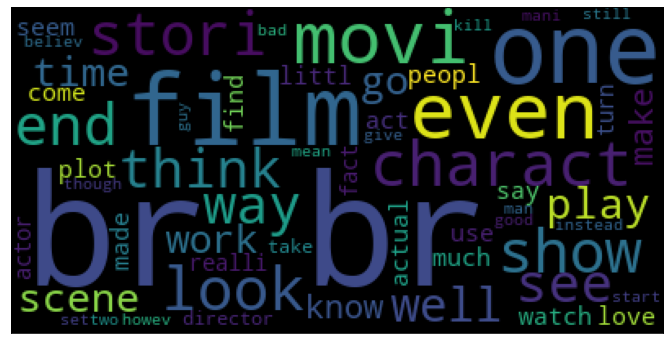

In [20]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(movie_re[movie_re['sentiment'] == 'negative']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc);

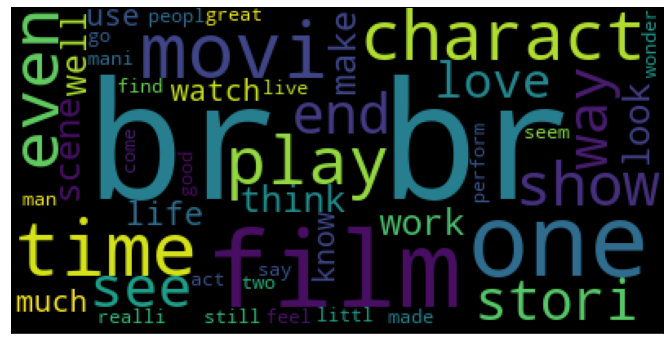

In [22]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
ham_wc = wc.generate(movie_re[movie_re['sentiment'] == 'positive']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(ham_wc);

In [24]:
np.random.seed(112)
movie_train, movie_val, movie_test = np.split(movie_re.sample(frac=1, random_state=42),
                                         [int(.7 * len(movie_re)), int(.8 * len(movie_re))])

print(len(movie_train), len(movie_val), len(movie_test))

35000 5000 10000
